In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## 1. Random Data Generator

### a. Univariate gaussian data generator
Marsaglia polar method: <br>
U,V ~ Uni(-1,1)<br>
if S = U^2+V^2 < 1 <br>
X = U\*(-2ln(S)/S)^0.5 \~ N(0,1)<br><br>
derive Y\~N(m,s) from X\~N(0,1)<br>
let Y = aX + b <br>
E[Y] = E[aX+b] = aE[X] + b = a\*0 + b = b<br>
Var[Y] = Var[aX+b] = Var[aX] = a^2 Var[X] = a^2<br>
Therefore, b = m, a = s^0.5<br>
Y = s^0.5X + m \~N(m,s)

In [2]:
# univariate gaussian data generator
# use Marsaglia polar method 

def UniGaussian(m,s):
    # generate X~N(0,1)
    S = 1
    while(S>=1):
        U = np.random.uniform(-1,1)
        V = np.random.uniform(-1,1)
        S = U**2 +V**2
    X = U * (-2 * math.log(S)/ S)**0.5
    
    # generate Y~N(m,s)
    Y = s **0.5*X + m
    
    return Y

### b. polynomail basis linear model data generator

In [3]:
# polynomial basis linear model data generator
def PolyBasis(n, a, w):
    x = np.random.uniform(-1,1)
    y= 0
    for i in range(n-1,-1,-1):
        y*=x
        y+=w[i]
    error = UniGaussian(0,a) 
    y+=error
    return x,y   

## 2. Sequential Estimator

In [23]:
def seqEstimator(m,s):
    print(f'Data point source function: N({m}, {s})\n')
    mean = 0.0        # E[x]
    square_mean = 0.0  # E[x^2]  
    var = 0.0  
    n=0
    threshold_mean = 1e-4
    threshold_var = 1e-3
    iteration = 0
    
    while True:
        x = UniGaussian(m,s)
        # E'[x] = (new x + n*E[x])/(n+1)
        new_mean = (x + n* mean)/(n+1)
        
        # Var'[x] = E'[x^2] -E'[x]^2 
        #         = (new x^2+ n* E[x^2])/(n+1)- E'[x]^2 
        new_square_mean = (x**2 + n*square_mean)/(n+1)
        new_var = new_square_mean - new_mean**2
        
        print("Add data point:", x)
        print(f'Mean = {new_mean}\tVariance = {new_var}')
        
        # check converge
        d_mean = abs(new_mean - mean)
        d_var = abs(new_var - var)
        if d_mean <= threshold_mean and d_var <= threshold_var:
            break
        if iteration > 10000:
            break
        iteration+=1
        
        mean = new_mean
        square_mean = new_square_mean
        var = new_var
        n+=1

In [24]:
m = int(input('Input mean ='))
s = int(input('Input variance ='))
seqEstimator(m,s)

Input mean =3
Input variance =5
Data point source function: N(3, 5)

Add data point: 3.040888275108256
Mean = 3.040888275108256	Variance = 0.0
Add data point: 3.3840847743979534
Mean = 3.2124865247531047	Variance = 0.029445959281176215
Add data point: 0.5099214746045626
Mean = 2.3116315080369243	Variance = 1.6427101618062023
Add data point: 1.4209736588292812
Mean = 2.0889670457350134	Variance = 1.3807710096712498
Add data point: 2.3729509703081355
Mean = 2.1457638306496376	Variance = 1.117520306843553
Add data point: 1.7352035438302824
Mean = 2.0773371161797454	Variance = 0.954677998635348
Add data point: 6.755390328636048
Mean = 2.745630432244932	Variance = 3.49799116518614
Add data point: 6.908294488871735
Mean = 3.2659634393232824	Variance = 4.955967337324262
Add data point: 5.613569502408783
Mean = 3.5268085574438937	Variance = 4.949625705022635
Add data point: 2.1946488644224376
Mean = 3.393592588141748	Variance = 4.614381584814362
Add data point: 2.1716675966556624
Mean = 3.2825

Add data point: 6.692236159519721
Mean = 2.9865123530063324	Variance = 5.343338551466179
Add data point: 3.2935746379648076
Mean = 2.9868098939801295	Variance = 5.338252172911687
Add data point: 1.1492796723032885
Mean = 2.9850310651111296	Variance = 5.336349942989964
Add data point: 6.064845191257395
Mean = 2.988009608753438	Variance = 5.34035355203042
Add data point: 6.626499866287008
Mean = 2.9915250582776243	Variance = 5.347972360603652
Add data point: 1.0546996574281196
Mean = 2.989655535689932	Variance = 5.34642766884104
Add data point: 4.325202147871707
Mean = 2.990943430205054	Variance = 5.342990385370756
Add data point: 0.7764495056668137
Mean = 2.988810006385653	Variance = 5.342562898378809
Add data point: 5.325497944645477
Mean = 2.9910589841895603	Variance = 5.34267097582166
Add data point: -2.333457494133042
Mean = 2.985939256806558	Variance = 5.364767653397902
Add data point: 1.0217291683160428
Mean = 2.984052407538075	Variance = 5.363316786394984
Add data point: 3.098579

Mean = 2.9811963910855104	Variance = 5.117033596560631
Add data point: 0.9649986307984082
Mean = 2.980226132298077	Variance = 5.116526408677295
Add data point: 1.2943832778799833
Mean = 2.9794152410742107	Variance = 5.115431734644558
Add data point: 1.1423062721280461
Mean = 2.978532015608371	Variance = 5.114594193802112
Add data point: 3.6047107671543177
Mean = 2.9788329184202627	Variance = 5.1123247643048195
Add data point: 4.000466323695749
Mean = 2.979323616501567	Variance = 5.110370349673175
Add data point: 6.175349352965437
Mean = 2.980857954349125	Variance = 5.112818408422683
Add data point: 5.334220702703421
Mean = 2.9819872071074527	Variance = 5.11302130682745
Add data point: -0.695356798150653
Mean = 2.9802234929562497	Variance = 5.1170516914042015
Add data point: 1.3129189885713226
Mean = 2.9794242098764867	Variance = 5.115930655915543
Add data point: 3.534054964994874
Mean = 2.9796899649100843	Variance = 5.113626648834899
Add data point: 5.843011694819576
Mean = 2.981061287

Add data point: 6.087040785143734
Mean = 2.9977889525046946	Variance = 5.04761268025268
Add data point: 3.063162506848262
Mean = 2.9978098988534114	Variance = 5.045996742941563
Add data point: 4.525426348628516
Mean = 2.998299205852058	Variance = 5.0451277063628535
Add data point: 3.61593744350212
Mean = 2.998496976661424	Variance = 5.043634343293828
Add data point: 0.9031363716944623
Mean = 2.997826246634226	Variance = 5.043424835067286
Add data point: 5.848402004712051
Mean = 2.998738430876811	Variance = 5.044410357328784
Add data point: 2.777099637069766
Mean = 2.9986675291513447	Variance = 5.042812371942674
Add data point: 7.298712345400278
Mean = 3.000042663406621	Variance = 5.047110952022903
Add data point: 1.8721348586975137
Mean = 2.999682079070077	Variance = 5.045904001370095
Add data point: 2.6149470330677205
Mean = 2.999559121241377	Variance = 5.044338667317064
Add data point: 5.5808164541977465
Mean = 3.0003838040953568	Variance = 5.044855096081587
Add data point: 2.5419498

Add data point: 6.697125932963811
Mean = 2.969217661250824	Variance = 5.090323560169427
Add data point: 4.004086752681255
Mean = 2.969461446666944	Variance = 5.089376652793748
Add data point: 0.24432274626877648
Mean = 2.968819633501518	Variance = 5.089926642255293
Add data point: 4.723488369797846
Mean = 2.9692327883723197	Variance = 5.08945294571231
Add data point: 6.588162572532652
Mean = 2.970084702163318	Variance = 5.091337154003451
Add data point: 3.5056659746820573
Mean = 2.9702107509448004	Variance = 5.090206403858971
Add data point: 4.767102101065581
Mean = 2.970633548909535	Variance = 5.089768251482093
Add data point: 2.029145584677288
Mean = 2.9704120744413554	Variance = 5.08877940716776
Add data point: 4.374844890562622
Mean = 2.970742373786633	Variance = 5.088046384647672
Add data point: 1.7057925767596933
Mean = 2.970444948487544	Variance = 5.087226181350301
Add data point: 5.198089832654276
Mean = 2.970968607369577	Variance = 5.087196564289316
Add data point: -0.62578679

## 4. Baysian Linear regression


In [6]:
# lambda matrix
def lambdaM(size, lambda_value):
    M = np.identity(size) * lambda_value
    return M
# zero matrix
def zeroM(size):
    M = np.zeros((size, size))
    return M

In [7]:
# LU decomposition A=LU
def LUDecomposition(A):
    n = A.shape[0]
    L = zeroM(n)
    U = A.copy()
    for i in range(n):
        L[i][i] = 1.0
        for j in range(i+1, n):
            scalar = U[j][i]/U[i][i]
            L[j][i] = scalar
            for k in range (n):
                U[j][k] -= scalar* U[i][k]
    return L, U

# find [Y], that [L][Y] = [I]
def FindY(L):
    n = L.shape[0]
    Y = zeroM(n)
    I = np.identity(n)
    # for every column solve Ly = b
    for i in range(n):
        b = I[:, i]
        y = np.zeros_like(b, dtype=np.float64)
        for row in range(n):
            y[row] = b[row]
            for col in range(row):
                y[row] -= L[row][col] * y[col]
            y[row] /= L[row][row]
        
        Y[:, i] = y
    return Y

# find [X], that [Y] = [U][X]
def FindX(Y, U):
    n = U.shape[0]
    X = np.zeros_like(Y)    
    # For every column, solve Ux = y
    for i in range(Y.shape[1]):
        y = Y[:, i]
        x = np.zeros_like(y, dtype=np.float64)
        for row in reversed(range(n)):
            x[row] = y[row]
            for col in range(row + 1, n):
                x[row] -= U[row][col] * x[col]
            x[row] /= U[row][row]
        
        X[:, i] = x
    
    return X

In [8]:
# Find inverse using LU decomposition
# to find A-1, that [A][A-1] = [I]
# step1: using [A] = [L][U]
# step2: find [Y], that [Y] = [U][A-1] => [A][A-1] = [L][U][A-1] = [L][Y] = [I]
# step3: find [X] = [A-1], that [Y] = [U][X]
def FindInverse(A):
    # step1: using [A] = [L][U]
    L, U = LUDecomposition(A)
    # step2: find [Y], that [L][Y] = [I]
    Y = FindY(L)
    # step3: find [X], that [Y] = [U][X]
    Inverse = FindX(Y,U)
    
    return Inverse

In [9]:
# design matrix phi
#|1, x^1, x^2, ...|
def phiM(x,N):  
    M = np.zeros((1, N))
    for i in range(N):
        M[0, i]=x**i
    return M.T

In [10]:
def Output(x,y, mean_w, var_w, mean_y, var_y):
    print(f"Add data point ({x:.5f}, {y:.5f}):")
    print("\nPosterior mean: ")
    for value in mean_w:
        print(f"{value[0]:.10f}")

    print("\nPosterior variance:")
    for row in var_w:
        print(", ".join([f"{value:.10f}" for value in row]))

    print(f"\nPredictive distribution ~ N({mean_y[0][0]:.5f}, {var_y[0][0]:.5f})\n")    

In [11]:
def subplot(post_mean_w, post_var_w, X, Y, a, n, title, x_idx, y_idx, g_truth):
    inv_coe = post_mean_w.flatten()
    coe = inv_coe[::-1]
    poly = np.poly1d(coe)

    num = 100
    x = np.linspace(-2, 2, num)
    y = poly(x)

    y_plus = np.zeros(num)
    y_minus = np.zeros(num)

    for i, xi in enumerate(x):
        # shift 1 std
        if g_truth:
            distance = a
            
        else:
            phi = phiM(xi, n)
            phiT = phi.T
            distance = 1/a + np.dot(np.dot(phiT, post_var_w), phi)

        y_plus[i] = y[i] + distance
        y_minus[i] = y[i] - distance


    plt.subplot(2, 2, x_idx * 2 + y_idx + 1)
    
    plt.plot(x, y, 'k')
    plt.plot(x, y_plus, 'r')
    plt.plot(x, y_minus, 'r')
    if ~g_truth:
        plt.scatter(X, Y, color='darkblue',s=10)

    plt.ylim(-20, 20)
    plt.xlim(-2, 2)
    
    plt.title(title)
    plt.grid(True)


|  | mean |variance| 
|--|--|--|
| w: prior | $$\mu$$ | $$\Lambda^{-1}$$|
| y: likelihood|$$w^T\Phi$$|$$a^{-1}$$|
| w: posterior| $$\mu ' = \Lambda '^{-1} (a y \Phi + \Lambda \mu)$$|$$\Lambda ' = a  \Phi \Phi^{T} + \Lambda$$ |
| y:marginal|$$\mu'^{T}\Phi$$|$$\frac{1}{a} + \Phi^{T}\Lambda'^{-1} \Phi$$|

In [20]:
def PredictiveModel(n,s,w,b):
    prior_mean_w = np.zeros((n,1))
    prior_lambda_w = lambdaM(n,b)
    X =[]
    Y =[]
    a = 1/s
    data_num = 0
    threshold_mean = 1e-2
    threshold_var = 1e-2
    mean_y = var_y = 0
    iteration = 0
    while True: 
        x,y = PolyBasis(n, s, w)        
        X.append(x)
        Y.append(y)
        
        phi = phiM(x,n)
        phiT = phi.T
        
        # lambda' for w = a*phi*phi^T+ lambda
        # mean' for w = lambda'^-1 (a*y*phi + lambda*mean)
        post_lambda_w = a* np.dot(phi, phi.T) + prior_lambda_w
        
        post_var_w = FindInverse(post_lambda_w)
        term1 = a*y* phi
        term2 = np.dot(prior_lambda_w,prior_mean_w)
        
        post_mean_w = np.dot(post_var_w,(term1+term2))

        
        # mean for y = (mean for w)^T * phi
        # var for y = 1/a + phi^T* (var for w) * phi
        mar_mean_y = np.dot(post_mean_w.T, phi)
        mar_var_y = 1/a + np.dot(np.dot(phiT, post_var_w), phi)
        
        prior_mean_w = post_mean_w
        prior_lambda_w = post_lambda_w
        
        Output(x,y, post_mean_w, post_var_w, mar_mean_y, mar_var_y)
        data_num+=1
        
        if data_num == 10:
            X_10 = X.copy()
            Y_10 = Y.copy()
            mean_10 = post_mean_w.copy()
            var_10 = post_var_w.copy()
            
        elif data_num == 50:
            X_50 = X.copy()
            Y_50 = Y.copy()
            mean_50 = post_mean_w.copy()
            var_50 = post_var_w.copy()
            
        # check converge
        d_mean = abs(mar_mean_y - mean_y)
        d_var = abs(mar_var_y - var_y)
        if d_mean <= threshold_mean and d_var <= threshold_var and data_num >=100:
            break
        if iteration > 10000:
            break
        iteration+=1
        mean_y = mar_mean_y
        var_y = mar_var_y
        
    plt.figure(figsize=(8, 6))

    # subplot(post_mean_w, post_var_w, X, Y, a, n, title, x_idx, y_idx, g_truth)
    subplot(np.array(w), None, None, None, s, n, "Ground truth", 0, 0,1)
    subplot(post_mean_w, post_var_w, X, Y, a, n, "Predict result", 0, 1,0)
    subplot(mean_10, var_10, X_10, Y_10, a, n, "After 10 data points", 1, 0,0)
    subplot(mean_50, var_50, X_50, Y_50, a, n, "After 50 data points", 1, 1,0)

    plt.tight_layout()
    plt.show()
        

Add data point (0.98941, 7.18337):

Posterior mean: 
1.2098806362
1.1970712153
1.1843974121

Posterior variance:
0.8315720217, -0.1666447736, -0.1648804483
-0.1666447736, 0.8351195517, -0.1631348025
-0.1648804483, -0.1631348025, 0.8385923616

Predictive distribution ~ N(3.55373, 4.48415)

Add data point (0.67736, 3.51963):

Posterior mean: 
1.3669070298
1.2762342234
1.2111068549

Posterior variance:
0.7258923761, -0.2199219231, -0.1828560534
-0.2199219231, 0.8082605039, -0.1721969922
-0.1828560534, -0.1721969922, 0.8355347967

Predictive distribution ~ N(2.78705, 3.69987)

Add data point (0.44704, 3.55518):

Posterior mean: 
1.5914971978
1.3168909881
1.1758222297

Posterior variance:
0.6294029722, -0.2373890590, -0.1676969194
-0.2373890590, 0.8050984900, -0.1694527878
-0.1676969194, -0.1694527878, 0.8331531948

Predictive distribution ~ N(2.41519, 3.51402)

Add data point (-0.87679, 0.45848):

Posterior mean: 
1.4695635831
1.5016199965
1.0689011487

Posterior variance:
0.5314726933, -0

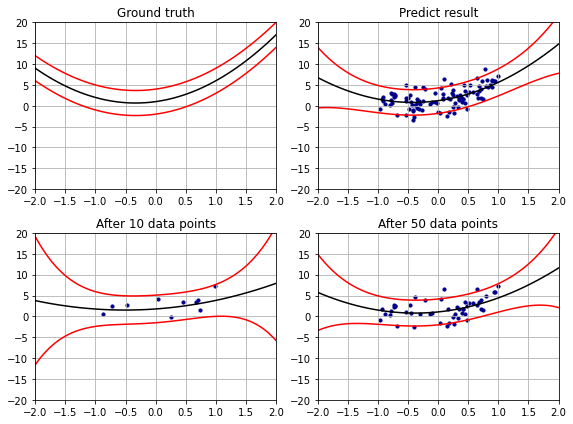

In [27]:
# Case1
b = 1
n = 4
a = 1
w = [1,2,3,4]

# Case2
b = 100
n = 4
a = 1
w = [1,2,3,4]

# Case3
b = 1
n = 3
a = 3
w = [1,2,3]
PredictiveModel(n,a,w,b)